# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Anjana Dhakal, 11/06/2024 (updated 11/11/2024)
GitHub link: https://github.com/anjana-codes/webming-04-project


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

### Question 1
The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [20]:
import requests
import json

# Access the API and store the result in a dictionary
url = 'https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul'
result = json.loads(requests.get(url).text)

# Write the result to a JSON file
filename = "songs_lyrics.json"
with open(filename, 'w') as json_file:
    json.dump(result, json_file,)

# To read the data back from the file for later use:
with open(filename, 'r') as json_file:
    lyrics_data = json.load(json_file)

# Print to verify the data is read correctly
print("The lyrics data saved in:", filename)




The lyrics data saved in: songs_lyrics.json


### Question 2
Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [21]:
import requests
import json
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.tokens import Doc

# Access the API and store the result in a dictionary
url = 'https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul'
result = json.loads(requests.get(url).text)

# Write the result to a JSON file
filename = "songs_lyrics.json"
with open(filename, 'w') as json_file:
    json.dump(result, json_file)

# To read the data back from the file for later use:
with open(filename, 'r') as json_file:
    lyrics_data = json.load(json_file)


# Split the lyrics into lines and print each line one by one
lyrics = lyrics_data.get("lyrics", "")
for line in lyrics.split('\n'):
    print(line)

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add the TextBlob pipe (this adds the polarity extension)
nlp.add_pipe("spacytextblob")

# Manually register the polarity extension for doc objects with force=True
Doc.set_extension("polarity", getter=lambda doc: doc._.blob.sentiment.polarity, force=True)

# Perform sentiment analysis on the lyrics
doc = nlp(lyrics)

# Access the polarity score
polarity_score = doc._.polarity
print("\nPolarity Score:", polarity_score)


# Comment on the polarity score
# If the polarity score is positive, the lyrics have a more positive connotation.
# If the polarity score is negative, the lyrics have a more negative connotation.
# The closer the score is to 1.0, the more positive; closer to -1.0, the more negative.

# Comment on the sentiment
if polarity_score > 0:
    print("The lyrics have a more positive connotation.")
elif polarity_score < 0:
    print("The lyrics have a more negative connotation.")
else:
    print("The lyrics have a neutral connotation.")


I'm your only friend 
I'm not your only friend 
But I'm a little glowing friend 
But really I'm not actually your friend 
But I am 


Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I have a secret to tell 

From my electrical well 

It's a simple message and I'm leaving out the whistles and bells 

So the room must listen to me 

Filibuster vigilantly 

My name is blue canary one note* spelled l-i-t-e 

My story's infinite 

Like the Longines Symphonette it doesn't rest 



Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I'm your only friend 

I'm not your only friend 

But I'm a little glowing friend 

But really I'm not actually your f

### Question 3
Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [22]:
import requests
import json

def get_and_save_lyrics(artist, song, filename):
    """
    Fetches the lyrics of a song from the lyrics.ovh API and writes it to a file.

    Parameters:
    - artist (str): The artist name.
    - song (str): The song title.
    - filename (str): The filename to store the lyrics.
    """
    # Access the API and store the result in a dictionary
    url = f'https://api.lyrics.ovh/v1/{artist}/{song}'
    response = requests.get(url)
    
    if response.status_code == 200:
        result = response.json()
        
        # Write the result to the specified JSON file
        with open(filename, 'w') as json_file:
            json.dump(result, json_file)
        
        print(f"Lyrics for '{song}' by {artist} have been saved to '{filename}'.")
    else:
        print(f"Error fetching lyrics for '{song}' by {artist}. Status code: {response.status_code}")

# Testing the function with four different songs and artists
get_and_save_lyrics("They Might Be Giants", "Birdhouse in your soul", "birdhouse_in_your_soul_lyrics.json")
get_and_save_lyrics("The Beatles", "Hey Jude", "hey_jude_lyrics.json")
get_and_save_lyrics("Adele", "Someone Like You", "someone_like_you_lyrics.json")
get_and_save_lyrics("Coldplay", "Fix You", "fix_you_lyrics.json")


Lyrics for 'Birdhouse in your soul' by They Might Be Giants have been saved to 'birdhouse_in_your_soul_lyrics.json'.
Lyrics for 'Hey Jude' by The Beatles have been saved to 'hey_jude_lyrics.json'.
Lyrics for 'Someone Like You' by Adele have been saved to 'someone_like_you_lyrics.json'.
Lyrics for 'Fix You' by Coldplay have been saved to 'fix_you_lyrics.json'.


### Question 4 
Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

Polarity Score for 'Birdhouse in your Soul': 0.04505208333333333
Polarity Score for 'Hey Jude': 0.13194444444444445
Polarity Score for 'Someone Like You': 0.24975845410628014


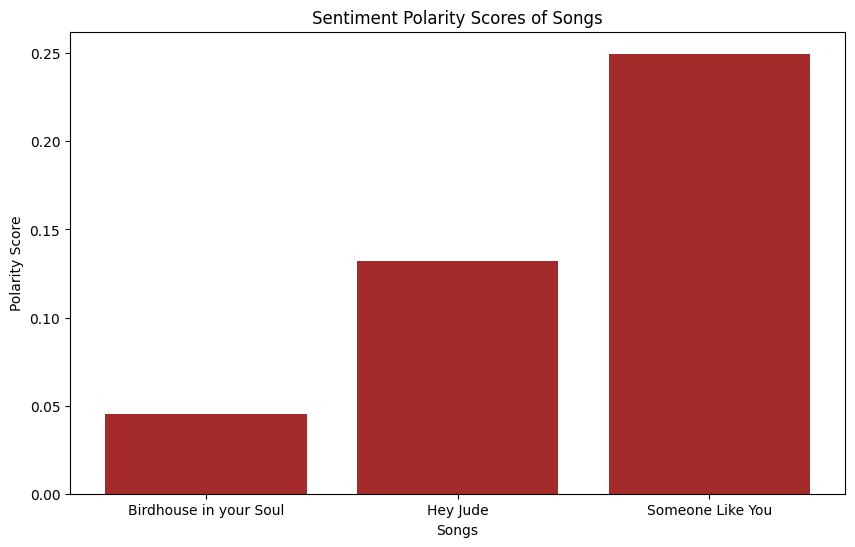


The song Birdhouse in Your Soul is close to neutral.
The song Hey Jude is a slightly positive polarity.
The song Someone Like You is higher than the others.


In [23]:
import json
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Initialize spaCy model and add the SpacyTextBlob pipeline component
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

def analyze_lyrics_sentiment(filename):
    """
    Loads song lyrics from a JSON file, performs sentiment analysis, and returns the polarity score.
    
    Parameters:
    - filename (str): The name of the JSON file containing the lyrics.
    
    Returns:
    - float: The polarity score of the lyrics.
    """
    # Load lyrics from file
    with open(filename, 'r') as json_file:
        data = json.load(json_file)
    
    lyrics = data.get("lyrics", "")
    
    # Perform sentiment analysis on the lyrics
    doc = nlp(lyrics)
    polarity_score = doc._.polarity
    
    return polarity_score

# Test the function on the three song files created previously
song_files = [
    ("Birdhouse in your Soul", "birdhouse_in_your_soul_lyrics.json"),
    ("Hey Jude", "hey_jude_lyrics.json"),
    ("Someone Like You", "someone_like_you_lyrics.json")
]

# Print the polarity scores for each song
for song, file in song_files:
    score = analyze_lyrics_sentiment(file)
    print(f"Polarity Score for '{song}': {score}")
    

# visualization of polarity score in bar graph   
import matplotlib.pyplot as plt

# Collect song titles and polarity scores
song_titles = []
polarity_scores = []

for song, file in song_files:
    score = analyze_lyrics_sentiment(file)
    song_titles.append(song)
    polarity_scores.append(score)

# Plotting the polarity scores as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(song_titles, polarity_scores, color='brown')
plt.xlabel("Songs")
plt.ylabel("Polarity Score")
plt.title("Sentiment Polarity Scores of Songs")
plt.show()


#Analysis of the Polarity Scores
print ("\nThe song Birdhouse in Your Soul is close to neutral.")
print ("The song Hey Jude is a slightly positive polarity.")
print ("The song Someone Like You is higher than the others.")



### Sentiment Analysis
1. "Someone Like You" has the highest polarity score of 0.2498. This score suggests that the lyrics are relatively positive or express a sense of sentimentality, possibly due to themes of love, longing, or nostalgia. The higher score indicates that the song's language leans more toward positive sentiment.

2. "Hey Jude" has a moderate polarity score of 0.1319. This reflects a mildly positive sentiment in the lyrics. This positivity aligns well with the song's supportive and reassuring tone, especially in the famous refrain encouraging "Hey Jude" to take a negative situation and make it better.

3. "Birdhouse in Your Soul" has the lowest polarity score of 0.0451, indicating a more neutral sentiment. While the lyrics may have positive elements, such as whimsical or quirky expressions, they are not as overtly sentimental or positive as the other songs.